# Random Forest

In [1]:
#Import modules
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
df = pd.read_csv('final_df.csv')

In [3]:
features_0 = ['YEAR', 'raceeth', 'How old are you', 'What is your sex',
       'In what grade are you','Seat belt use', 'Riding with a drinking driver',
       'Drinking and driving', 'Weapon carrying', 'Weapon carrying at school',
       'Safety concerns at school', 'Threatened at school',
       'Physical fighting', 'Physical fighting at school',
       'Forced sexual intercourse', 'Bullying at school',
       'Electronic bullying', 'Sad or hopeless', 'Considered suicide',
       'Made a suicide plan', 'Attempted suicide', 'Injurious suicide attempt',
       'Ever cigarette use', 'Initiation of cigarette smoking',
       'Current cigarette use', 'Current smokeless tobacco use',
       'Current cigar use', 'Initiation of alcohol use', 'Current alcohol use',
       'Source of alcohol', 'Ever marijuana use',
       'Initiation of marijuana use', 'Current marijuana use',
       'Ever steroid use', 'Illegal injected drug use',
       'Illegal drugs at school', 'Ever sexual intercourse',
       'Sex before 13 years', 'Multiple sex partners',
       'Current sexual activity', 'Alcohol/drugs and sex', 
        'Perception of weight', 'Weight loss',
       'Television watching', 'Computer use', 'HIV testing', 'Asthma', 'Sleep',
       'Ever used LSD',
       'Has used hard drugs', 'healthy_eating', 'regular_activity']
condom_use = df['Condom use']

In [4]:
#Split X and y 
X = df[features_0]
y = condom_use

In [5]:
#Train Test Split and Standard Scaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [6]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
# Preview synthetic sample class distribution
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts())
print('--------------------')
print(pd.Series(y_train_resampled).value_counts(normalize=True))

Synthetic sample class distribution: 

3.0    22755
2.0    22755
1.0    22755
Name: Condom use, dtype: int64
--------------------
3.0    0.333333
2.0    0.333333
1.0    0.333333
Name: Condom use, dtype: float64


In [7]:
#Instantiate model
rfc = RandomForestClassifier(random_state=42, max_depth=5)

In [8]:
#fit the model to the training data
rfc.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=5, random_state=42)

In [9]:
#use the fitted model to predict on the test data
rfc_preds_test = rfc.predict(X_test)
rfc_preds_train = rfc.predict(X_train)
rfc_f1_test = metrics.f1_score(y_test, rfc_preds_test,average = 'weighted')
rfc_f1_train = metrics.f1_score(y_train, rfc_preds_train,average = 'weighted')
rfc_acc_test = metrics.accuracy_score(y_test, rfc_preds_test)
rfc_acc_train = metrics.accuracy_score(y_train, rfc_preds_train)
# checking accuracy on the test data
print('Test F1 score test: ', rfc_f1_test)
print('Test Accuracy score test: ', rfc_acc_test)

print('Test F1 score test train: ', rfc_f1_train)
print('Test Accuracy score train: ', rfc_acc_train)

Test F1 score test:  0.8370532336435565
Test Accuracy score test:  0.8392470307014268
Test F1 score test train:  0.8427750147431374
Test Accuracy score train:  0.8448743806180125


In [10]:
#Now with cross validation search
val = cross_val_score(RandomForestClassifier(random_state=42),X_train_resampled, y_train_resampled,cv=5)
val.mean()

0.9160331062770087

In [11]:
rfc.score(X_test, y_test)

0.8392470307014268

[[7497    0    0]
 [   0 2618  929]
 [   1 1222 1120]]


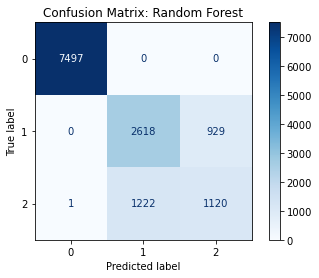

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, rfc_preds_test)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix: Random Forest')
plt.show()